#**Final Project** : Walmart Stores Sales Forecasting
#### **Group7_Members**: Ladan, Milad, Nasir, Safoura, Samareh







#**Task Description** 

 In this project the forecasts are based on a median of the weekly sales grouped by the Type of Store, Store & Department number, Month and Holiday dummy.

1.   **Load Data and Libraries**
2.   **Data manipulation**, this step is including: Data Cleaning , Creating lagged variables based on time , Creating dummy variables for categorical values, Creating interaction variable and so on. . 
3.   **Model Building** and **Data Visualization** , in this step we need to analize all data we have like:  Exploratory Analysis, descripting statistics and visualizing resuls and so on. 
4. **Forcasting Model** , this part is including: selecting a Machin Learning Algorithm, Predicting future values , forcasting time series and so on.  








# 1- Definding libraries and Loading Data 

##1-1- Import Libraries

In [1]:
# Necessary libraries 
import pandas as pd
import numpy as np

# Some Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm

# Machin Learning Tools 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##1-2- Loading Data
Load the data from the files into the DataFrame. Set the names of columns according to the column definitions given in Data Description.


In [0]:
storesurl = "https://raw.githubusercontent.com/Nasiradin/utoronto3250G7/master/data/stores.csv"
featuresurl = "https://raw.githubusercontent.com/Nasiradin/utoronto3250G7/master/data/features.csv"
sample_submissionurl = "https://raw.githubusercontent.com/Nasiradin/utoronto3250G7/master/data/sample_submission.csv"
trainurl = "https://raw.githubusercontent.com/Nasiradin/utoronto3250G7/master/data/train.csv"
testurl = "https://raw.githubusercontent.com/Nasiradin/utoronto3250G7/master/data/test.csv"

storesdataset = pd.read_csv(storesurl,names=['Store','Type','Size'],sep=',', header=0 )
featuresdataset = pd.read_csv(featuresurl ,names= ['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday'],sep=',',header=0)
sampledataset = pd.read_csv(sample_submissionurl, names=['Weekly_Sales','id'],sep=',', header=0)
traindataset = pd.read_csv(trainurl, names=['Store','Dept','Date','weeklySales','isHoliday'],sep=',', header=0)
testdataset = pd.read_csv(testurl, names=['Store','Dept','Date','isHoliday'],sep=',', header=0)

###Displaying Head of DataFarames 

In [3]:
# Store
storesdataset.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


###Features
Store - the store number. Date - the week. Temperature - average temperature in the region. Fuel_Price - cost of fuel in the region. MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA. CPI - the consumer price index. Unemployment - the unemployment rate. IsHoliday - whether the week is a special holiday week.

In [4]:
#Features 
featuresdataset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
featuresdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


Changing the type of Date from object to Datetime

In [6]:
featuresdataset['Date']=pd.to_datetime(featuresdataset['Date'])
featuresdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [7]:
#sample_submission
sampledataset.head()

,Weekly_Sales,id
0,0.578183,28_40_2012-01-06
1,0.145442,18_93_2012-03-09
2,0.839833,38_4_2011-05-27
3,0.030395,29_33_2010-03-12
4,0.525419,13_52_2010-10-29


###Train
This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number Dept - the department number Date - the week Weekly_Sales - sales for the given department in the given store IsHoliday - whether the week is a special holiday week

In [8]:
# Train 
traindataset.head()

,Store,Dept,Date,weeklySales,isHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


####Train Describtion 

In [9]:
traindataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store        421570 non-null  int64  
 1   Dept         421570 non-null  int64  
 2   Date         421570 non-null  object 
 3   weeklySales  421570 non-null  float64
 4   isHoliday    421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [10]:
traindataset.describe()

,Store,Dept,weeklySales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


We should change the type of Date in train from "object" to "Datetime"

In [11]:
traindataset['Date']=pd.to_datetime(traindataset['Date'])
traindataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Store        421570 non-null  int64         
 1   Dept         421570 non-null  int64         
 2   Date         421570 non-null  datetime64[ns]
 3   weeklySales  421570 non-null  float64       
 4   isHoliday    421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [12]:
# Test
testdataset.head()

,Store,Dept,Date,isHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [13]:
testdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   isHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [14]:
testdataset['Date']=pd.to_datetime(testdataset['Date'])
testdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Store      115064 non-null  int64         
 1   Dept       115064 non-null  int64         
 2   Date       115064 non-null  datetime64[ns]
 3   isHoliday  115064 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2)
memory usage: 2.7 MB


#2-Data manipulation

##2-1- Data Cleaning

####Check for null values


In [15]:
# Stores 
storesdataset.isnull().any()

Store    False
Type     False
Size     False
dtype: bool

In [16]:
# Features 
featuresdataset.isnull().any()

Store           False
Date            False
Temperature     False
Fuel_Price      False
MarkDown1        True
MarkDown2        True
MarkDown3        True
MarkDown4        True
MarkDown5        True
CPI              True
Unemployment     True
IsHoliday       False
dtype: bool

There are null values present in the Markdown, CPI and Unemployment columns of the features data frame. Lets check howmany are there

In [17]:
# Check exact NULL values at Features 
featuresdataset.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [18]:
# Sample_Submission
sampledataset.isnull().any()

Weekly_Sales    False
id              False
dtype: bool

In [19]:
# Train 
traindataset.isnull().any()

Store          False
Dept           False
Date           False
weeklySales    False
isHoliday      False
dtype: bool

In [20]:
# Test 
testdataset.isnull().any()

Store        False
Dept         False
Date         False
isHoliday    False
dtype: bool

##2-2 Merging Data

### 2-2-1- Merging Train and Test

Due to data volume, we will combine the train and test data in order to have enough data to perform Feature Engineering.

In [21]:
traindataset.shape, testdataset.shape, featuresdataset.shape

((421570, 5), (115064, 4), (8190, 12))

In [0]:
df=pd.concat([featuresdataset,traindataset,testdataset],axis=0)

In [23]:
df.shape

(544824, 15)

In [24]:
df.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,weeklySales,isHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,NaN,NaN,NaN
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,NaN,NaN,NaN
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,NaN,NaN,NaN
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,NaN,NaN,NaN
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,NaN,NaN,NaN


On markdown columns **` NaN `** means that there was no markdown event for that date. So, we can replace **`NaN`** with 0 to indicate there is no mark down

In [25]:
#First will take alokk what happens when we replace NA's with 0
df.fillna(0).head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,weeklySales,isHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0


Removing Rows with null values in all columns 

In [0]:
df.dropna(axis=0, how="all", inplace=True)

Removing Rows with null values in all rows

In [0]:
df.dropna(axis=1, how="all", inplace=True)

In [28]:
#take a look on the DataFrame
df.shape

(544824, 15)

In [0]:
#Fill missing values with 0
df_fill=df.fillna(0)

In [30]:
#Display DataFrame
df_fill.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,weeklySales,isHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0,0.0,0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0,0.0,0
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0,0.0,0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0,0.0,0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0,0.0,0


### 2-2-2- Merge all DataSets including: Train, Strore and Feature 

In [31]:
#merge the datasets
dataset_all = traindataset.merge(storesdataset, how='left').merge(featuresdataset, how='left')
dataset_all.head()

,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


##2-3 Missing Data 

In [32]:
# Check if there is any NULL values on Dataframe
df_fill.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Dept            0
weeklySales     0
isHoliday       0
dtype: int64

In [33]:
# Describe the dataframe
df_fill.info()
df_fill.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 544824 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         544824 non-null  int64         
 1   Date          544824 non-null  datetime64[ns]
 2   Temperature   544824 non-null  float64       
 3   Fuel_Price    544824 non-null  float64       
 4   MarkDown1     544824 non-null  float64       
 5   MarkDown2     544824 non-null  float64       
 6   MarkDown3     544824 non-null  float64       
 7   MarkDown4     544824 non-null  float64       
 8   MarkDown5     544824 non-null  float64       
 9   CPI           544824 non-null  float64       
 10  Unemployment  544824 non-null  float64       
 11  IsHoliday     544824 non-null  object        
 12  Dept          544824 non-null  float64       
 13  weeklySales   544824 non-null  float64       
 14  isHoliday     544824 non-null  object        
dtypes: datetime64[ns]

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,weeklySales
count,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000
mean,22.220517,0.892265,0.051200,52.043454,18.143804,11.672103,20.936541,30.717216,2.407318,0.109252,43.611708,12365.863081
std,12.793920,7.576901,0.417807,999.040140,689.572588,929.208371,601.458362,1182.693075,20.770490,0.944640,30.772363,21066.981451
min,1.000000,-7.290000,0.000000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,0.000000,0.000000,0.000000,-4988.940000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.377500
50%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,3917.305000
75%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,15203.442500
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,99.000000,693099.360000


In [0]:
# Use mean to impute the missing values
df_Temp_mean= df.Temperature.fillna(df['Temperature'].mean())
df_Unemployment_mean= df.Unemployment.fillna(df['Unemployment'].mean())
df_Weekly_Sales_mean= df.weeklySales.fillna(float(df['weeklySales'].mean()))

In [0]:
df_fill['Temp_mean']=df_Temp_mean
df_fill['Unemployment_mean']=df_Unemployment_mean
df_fill['Weekly_Sales_mean']=df_Weekly_Sales_mean

In [36]:
df_fill.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,weeklySales,Temp_mean,Unemployment_mean,Weekly_Sales_mean
count,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000,544824.000000
mean,22.220517,0.892265,0.051200,52.043454,18.143804,11.672103,20.936541,30.717216,2.407318,0.109252,43.611708,12365.863081,59.356198,7.826821,15981.258123
std,12.793920,7.576901,0.417807,999.040140,689.572588,929.208371,601.458362,1182.693075,20.770490,0.944640,30.772363,21066.981451,2.289983,0.221777,19977.741247
min,1.000000,-7.290000,0.000000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,0.000000,0.000000,0.000000,-4988.940000,-7.290000,3.684000,-4988.940000
25%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,25.377500,59.356198,7.826821,3330.647500
50%,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,3917.305000,59.356198,7.826821,13479.800000
75%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,15203.442500,59.356198,7.826821,15981.258123
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,99.000000,693099.360000,101.950000,14.313000,693099.360000


In [37]:
# Take a look on final DataFrame
df_fill.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,weeklySales,isHoliday,Temp_mean,Unemployment_mean,Weekly_Sales_mean
115059,45,2013-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,98.0,0.0,False,59.356198,7.826821,15981.258123
115060,45,2013-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,98.0,0.0,False,59.356198,7.826821,15981.258123
115061,45,2013-07-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,98.0,0.0,False,59.356198,7.826821,15981.258123
115062,45,2013-07-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,98.0,0.0,False,59.356198,7.826821,15981.258123
115063,45,2013-07-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,98.0,0.0,False,59.356198,7.826821,15981.258123


#3- Data Analysis/Exploration

##3-1 Data Visualization

3-1-1- WeeklySales is one of the most important variables, so we will take a quick look at its distrubtion

In [38]:
#Quick statistical look
dataset_all.describe()

,Store,Dept,weeklySales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


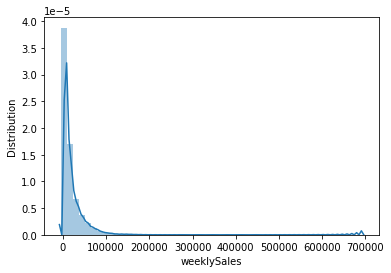

In [39]:
#plot distribution for weekly sales
sns.distplot(dataset_all['weeklySales'])
plt.ylabel('Distribution');

3-1-2- Summing all the cumulative sales of diffirent stores on the same dates together

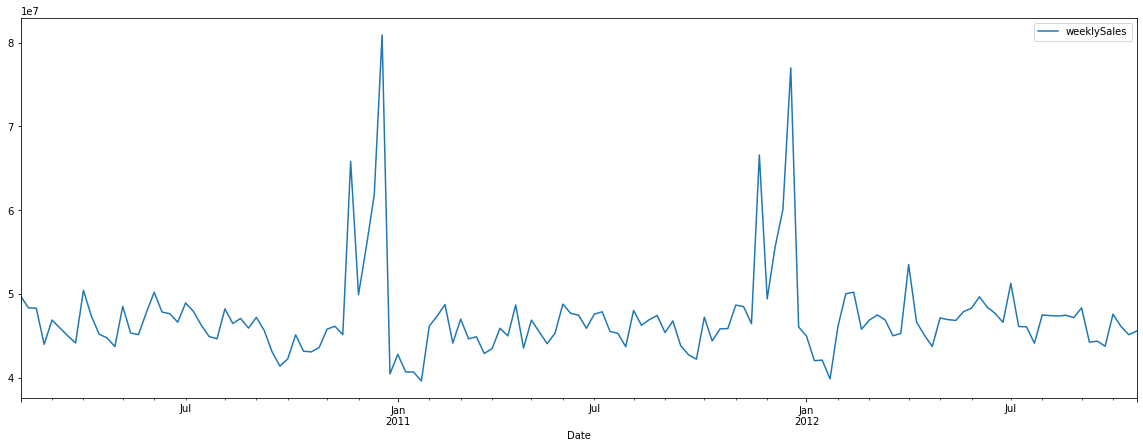

In [40]:
Date_WeeklySales = traindataset.groupby('Date')['weeklySales'].sum().reset_index()
Date_WeeklySales = Date_WeeklySales.set_index('Date')
Date_WeeklySales.index
Date_WeeklySales.index.name = 'Date'
Date_WeeklySales.plot(figsize=(20,7))


The graph shows sales from 45 stores in US. We can notice that sales increases every year just before new year.

###3-1-3- Average weekly sales during 2010 to 2012



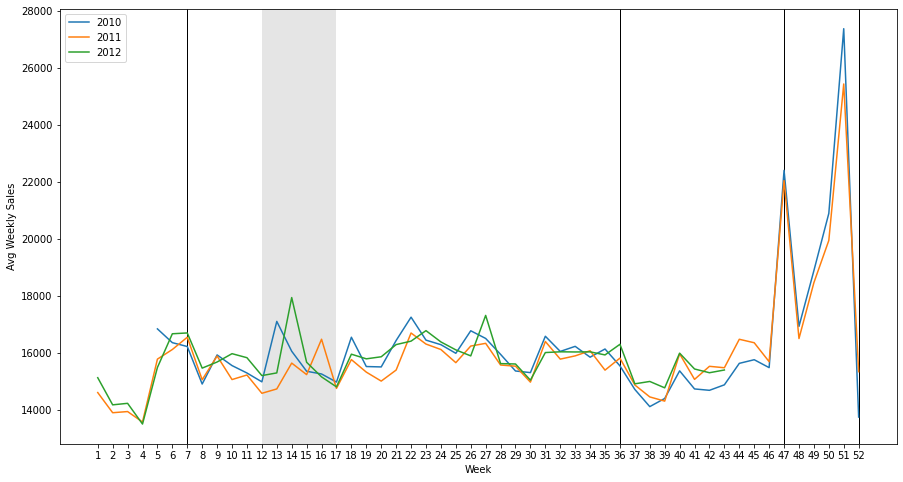

In [41]:
sales_avg = dataset_all.groupby(['Store']).mean()

year2010 = ((dataset_all[dataset_all['Date'].dt.year == 2010]))
year2011 = ((dataset_all[dataset_all['Date'].dt.year == 2011]))
year2012 = ((dataset_all[dataset_all['Date'].dt.year == 2012]))

# add date as index so we can use the resample function
year2010.index = year2010['Date']
year2011.index = year2011['Date'] 
year2012.index = year2012['Date'] 

# finally resample it by week 
wsales_2010 = year2010.resample('W').mean()
wsales_2011 = year2011.resample('W').mean()
wsales_2012 = year2012.resample('W').mean()

plt.figure(figsize=(15,8))
ax = sns.lineplot(wsales_2010.index.week, wsales_2010['weeklySales'].values,markers=True)
ax2 = sns.lineplot(wsales_2011.index.week, wsales_2011['weeklySales'].values,markers=True)
ax3 = sns.lineplot(wsales_2012.index.week, wsales_2012['weeklySales'].values,markers=True)
ax3.axvspan(7, 7, color='black', alpha=1)
ax3.axvspan(36, 36,  color='black', alpha=1)
ax3.axvspan(47, 47,  color='black', alpha=1)
ax3.axvspan(52, 52,  color='black', alpha=1)
ax3.axvspan(12, 17,facecolor='gray', alpha=0.2)
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'], loc='best')
plt.ylabel('Avg Weekly Sales')
plt.xlabel('Week')
plt.show()

Here we analyze the weekly sale per year and check how the holidays affect the sales. The black lines represent the exact weeks for the super bowl, labor day, thanksgiving, and christmas, respectively. We notice that the peak of sales fall on the same week of the holidays, except for christmas when the peak is the week before.

Another important remark we get from the data is another important holiday which is Easter (gray shaded area). The week of this holiday is not aligned with the other ones. Although the Easter holiday brings more revenue to the store than Superbowl, it is not included in the isHoliday data. We will make a small adjustment later on.

###3-1-4-Sales in Holidays

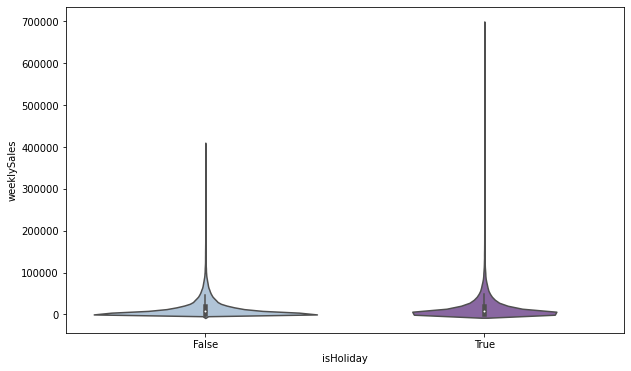

In [42]:
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.violinplot(x="isHoliday", y="weeklySales",
                    data=dataset_all, palette="BuPu");

We check what is the difference of weekly sales when it is holiday and when it is not. The revenue is bigger when we have holidays than otherwise. We can notice that the holidays have some big outliers.



###3-1-5- Correlation between all features 

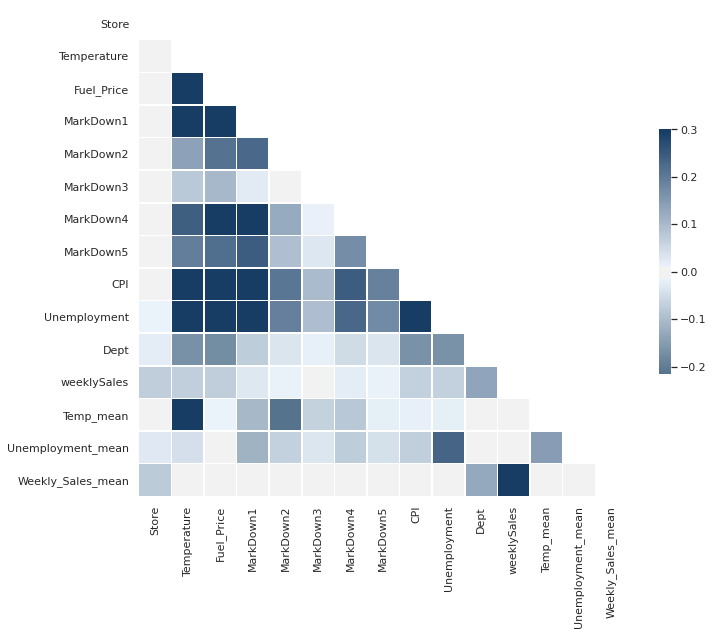

In [43]:
# Code from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Compute the correlation matrix
corr = df_fill.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(245, 250,s=85 ,l=25,n=7, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5} )

Most of what we see in the correlation table is of little surprise. Discounts are correlated and higher unemployment means lower Consumer Price Index. More interestingly, it appears that higher department numbers have higher sales. Maybe because they are newer? Also, larger stores generate more sales, discounts generally generate higher sales values and larger unemployment result in a bit fewer sales. Unfortunately, there appears to be little relationship between holidays, temperatures or fuelprices with our weekly sales.

Next up, let's plot some of these relationships to get a clearer image.

In [0]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['weeklySales'])
    plt.ylabel('weeklySales')
    plt.xlabel(column)

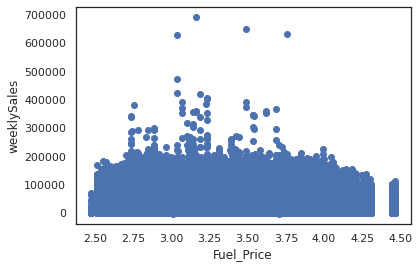

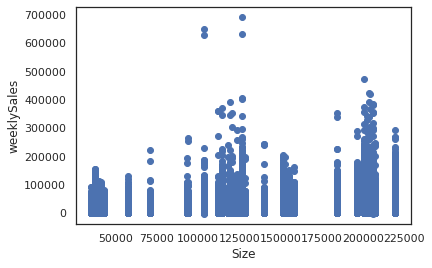

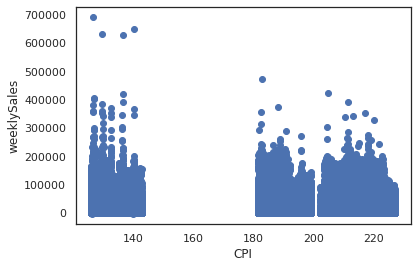

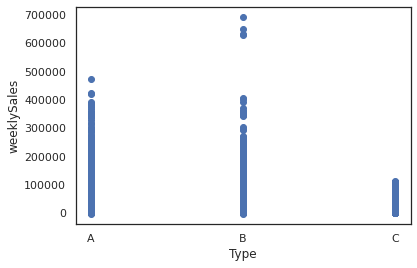

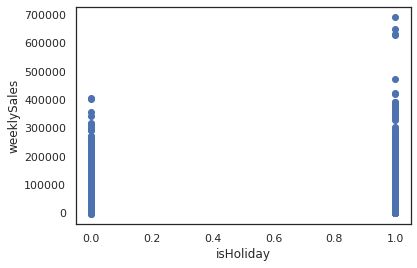

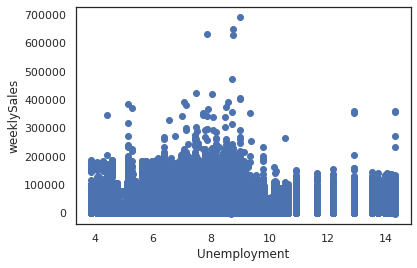

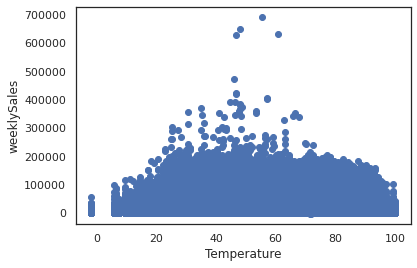

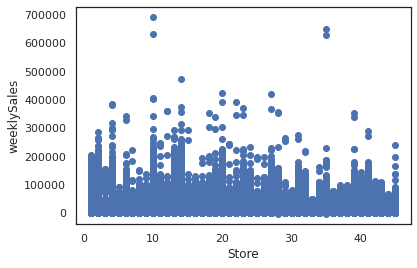

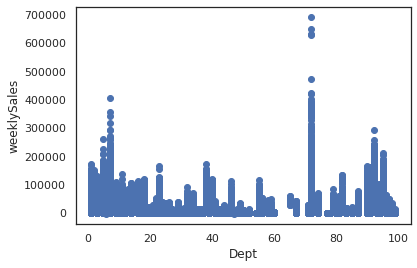

In [45]:
scatter(dataset_all, 'Fuel_Price')
scatter(dataset_all, 'Size')
scatter(dataset_all, 'CPI')
scatter(dataset_all, 'Type')
scatter(dataset_all, 'isHoliday')
scatter(dataset_all, 'Unemployment')
scatter(dataset_all, 'Temperature')
scatter(dataset_all, 'Store')
scatter(dataset_all, 'Dept')

###3-1-5- Weekly sales per store

We also check the weekly sales per store to see if there's any important pattern in this feature



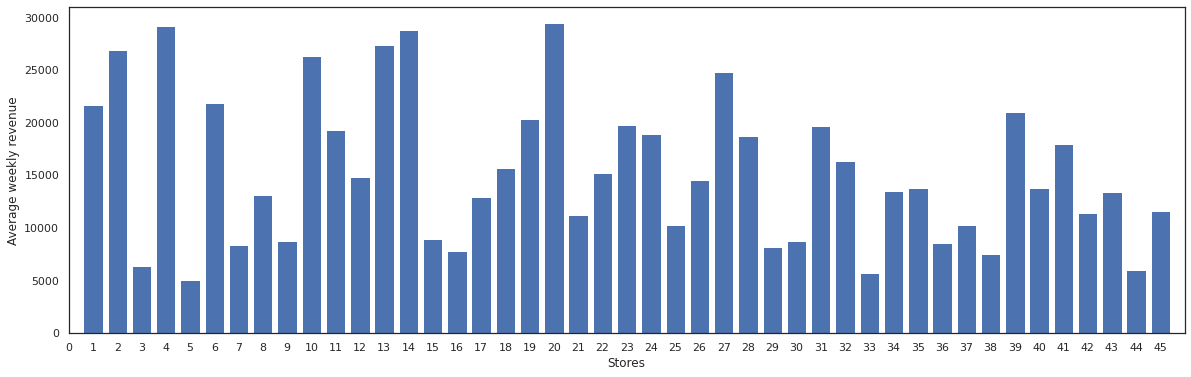

In [46]:
#Take the average per store and department
stores_avg = dataset_all.groupby(['Store']).mean()

plt.figure(figsize=(20,6))
plt.xlim([1, len(stores_avg.index)+1])
plt.xticks(range(len(stores_avg.index)+1))
plt.bar(stores_avg.index,stores_avg['weeklySales'])
plt.xlabel('Stores')
plt.ylabel('Average weekly revenue')
plt.show()

###3-1-7-The stores are sperated by 3 types: A, B, and C. We take a look at how this is distributed. However, it is not clear what exactly A, B, and C mean.

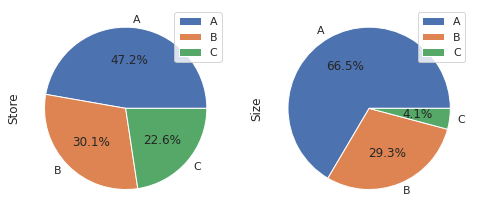

In [47]:
stores_total = storesdataset.groupby(['Type']).sum()
plot = stores_total.plot.pie(subplots=True, figsize=(8, 6),autopct='%1.1f%%')

## 3-2 Data Analysis

In [48]:
dataset_all.loc[dataset_all['weeklySales'] >300000]

,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
30474,4,7,2011-12-23,318422.01,False,A,205863,35.92,3.103,2461.94,69.05,2938.24,52.00,4396.76,129.984548,5.143,False
37201,4,72,2010-11-26,381072.11,True,A,205863,48.08,2.752,NaN,NaN,NaN,NaN,NaN,126.669267,7.127,True
37253,4,72,2011-11-25,385051.04,True,A,205863,47.96,3.225,561.45,137.88,83340.33,44.04,9239.23,129.836400,5.143,True
56417,6,72,2010-11-26,342578.65,True,A,202505,65.79,2.735,NaN,NaN,NaN,NaN,NaN,213.267296,7.007,True
56469,6,72,2011-11-25,326866.60,True,A,202505,62.78,3.236,429.03,171.88,83192.81,15.00,986.23,220.041741,6.551,True
88428,10,7,2010-12-24,406988.63,False,B,126512,57.06,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,False
88480,10,7,2011-12-23,341308.00,False,B,126512,48.36,3.541,300.02,77.73,2432.01,108.37,4078.21,129.984548,7.874,False
95373,10,72,2010-11-26,693099.36,True,B,126512,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,True
95377,10,72,2010-12-24,404245.03,False,B,126512,57.06,3.236,NaN,NaN,NaN,NaN,NaN,126.983581,9.003,False
95425,10,72,2011-11-25,630999.19,True,B,126512,60.68,3.760,174.72,329.00,141630.61,79.00,1009.98,129.836400,7.874,True


It appears to be quite obvious. The end of November sees a lot of exceptionally large sales. This special day, better known as Black friday, causes sales to be on fire, and undoubtedly a dummy variable should be created for this day. Also, Christmas, appears here and there. Since it is not considered holiday, we will also make a dummy for this day. Let's see if we should consider some other special days as well.



In [49]:
dataset_all.loc[dataset_all['weeklySales'] >240000,"Date"].value_counts()

2010-11-26    23
2011-11-25    22
2010-12-24    14
2011-12-23     9
2010-12-17     2
2011-08-26     1
2010-02-05     1
Name: Date, dtype: int64

Except for a handful spurious other dates, it appears that the two days before Christmas and Black Friday will do the job

##3-3 Dummy variables

###Dummy variables: Categorical Data
Now we have to create some dummy variebles for categorical data.

In [50]:

# Make sure we can later recognize what a dummy once belonged to
dataset_model = dataset_all 
dataset_model.head()

,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


####Dummy variables: Dates
From our earlier analysis, it has turned out that the date may be our best friend. As a general rule, it is a good start to already distinguish between different months in our model. This will create 12 dummy variables; one for each month.

In [51]:
dataset_model['year']=dataset_model['Date'].dt.year
dataset_model['month']=dataset_model['Date'].dt.month
dataset_model['week']=dataset_model['Date'].dt.week
dataset_model = dataset_model.drop(['Date'],axis=1)
Year_dummies = pd.get_dummies(dataset_model['year'])
Month_dummies = pd.get_dummies(dataset_model['month'])
Week_dummies = pd.get_dummies(dataset_model['week'])
dataset_model.head()

,Store,Dept,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,month,week
0,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,2,5
1,1,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010,2,6
2,1,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010,2,7
3,1,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,2010,2,8
4,1,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,2010,3,9


Next, let's look at 'special dates'. One variable for Christmas, one for black friday. We have to manually look up the dates of black friday if we want to extrapolate our data to other years, but for now we know: 26 - 11 - 2010 and 25 - 11 - 2011.

In [0]:
dataset_model['Black_Friday'] = np.where((dataset_all['Date']=='2010-11-26') | (dataset_all['Date']=='2011-11-25'), 'yes', 'no')
dataset_model['Pre_christmas'] = np.where((dataset_all['Date']=='2010-12-23') | (dataset_all['Date']=='2010-12-24') | (dataset_all['Date']=='2011-12-23') | (dataset_all['Date']=='2011-12-24'), 'yes', 'no')


In [53]:
dataset_model.head()

,Store,Dept,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,month,week,Black_Friday,Pre_christmas
0,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,2,5,no,no
1,1,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010,2,6,no,no
2,1,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010,2,7,no,no
3,1,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,2010,2,8,no,no
4,1,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,2010,3,9,no,no


In [0]:
dataset_model['Black_Friday'] = 'Black_Friday_' + dataset_model['Black_Friday'].map(str)
dataset_model['Pre_christmas'] = 'Pre_christmas_' + dataset_model['Pre_christmas'].map(str)
Black_Friday_dummies = pd.get_dummies(dataset_model['Black_Friday'] )
Pre_christmas_dummies = pd.get_dummies(dataset_model['Pre_christmas'] )

In [55]:
dataset_model = dataset_model.fillna(0)
dataset_model.head()

,Store,Dept,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,month,week,Black_Friday,Pre_christmas
0,1,1,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5,Black_Friday_no,Pre_christmas_no
1,1,1,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,2,6,Black_Friday_no,Pre_christmas_no
2,1,1,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010,2,7,Black_Friday_no,Pre_christmas_no
3,1,1,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010,2,8,Black_Friday_no,Pre_christmas_no
4,1,1,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010,3,9,Black_Friday_no,Pre_christmas_no


In [56]:
#it's easily done by multiplying the entire dataset by 1
dataset_model = dataset_model*1
dataset_model.head()

,Store,Dept,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,year,month,week,Black_Friday,Pre_christmas
0,1,1,24924.50,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2010,2,5,Black_Friday_no,Pre_christmas_no
1,1,1,46039.49,1,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,2010,2,6,Black_Friday_no,Pre_christmas_no
2,1,1,41595.55,0,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,2010,2,7,Black_Friday_no,Pre_christmas_no
3,1,1,19403.54,0,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,2010,2,8,Black_Friday_no,Pre_christmas_no
4,1,1,21827.90,0,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,2010,3,9,Black_Friday_no,Pre_christmas_no


In [57]:
print(dataset_model['weeklySales'].groupby(dataset_model['Black_Friday']).mean())


Black_Friday
Black_Friday_no     15891.793958
Black_Friday_yes    22220.944538
Name: weeklySales, dtype: float64


In [58]:
print(dataset_model['weeklySales'].groupby(dataset_model['Pre_christmas']).mean())

Pre_christmas
Pre_christmas_no     15831.316500
Pre_christmas_yes    26396.399283
Name: weeklySales, dtype: float64


According to the findings in the latest lines, we can see that the amount of purchases from the stores, during the Pre christmas times were much higher that the purchases that took place during the black fridays in general.

#4- Forcasting

## 4-1 TimeSeries forcasting

###Stationarity : Adfuller Test
To determine the forecast a time series, it needs to be stationary. Adfuller test helps us in determining the stationarity of time sereis

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,dftest)

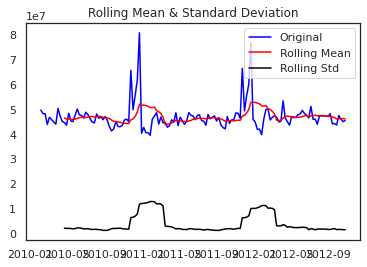

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-5.908297957186322, 2.6759791589861746e-07, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 4314.46014989216)


In [60]:
test_stationarity(Date_WeeklySales['weeklySales'])

Taking log of the time series to further achieve a level of stationarity

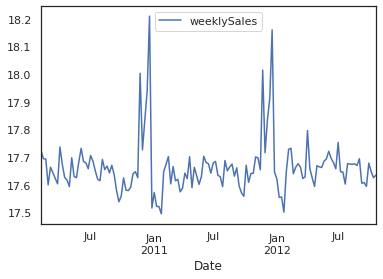

In [61]:
ts_log = np.log(Date_WeeklySales)
ts_log.plot()

###Gaps in TIme Series
Since we have weekly gaps in the time series, we need to set the frequency

In [0]:

Date_WeeklySales.index = pd.DatetimeIndex(Date_WeeklySales.index.values,
                               freq=Date_WeeklySales.index.inferred_freq)
ts_log.index = pd.DatetimeIndex(ts_log.index.values,
                               freq=ts_log.index.inferred_freq)


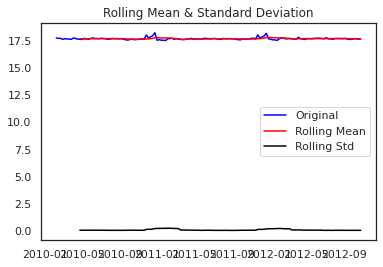

Results of Dickey-Fuller Test:
Test Statistic                -6.332826e+00
p-value                        2.878283e-08
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-6.332825845560066, 2.878282547251501e-08, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, -255.70088316786007)


In [63]:
test_stationarity(ts_log['weeklySales'])


In [64]:
Date_WeeklySales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Freq: W-FRI
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weeklySales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


###Eliminating Seasonality & Trends

1.  Differencing : THis is specifically to remove the trend in the time series by differencing from the shifted version of same time series

2.   Decomposing : It decomposes the time series into 3 parts such as TrenDs,Seasonality and Residual. We perform adfuller test on residual and if it's stationary we add trends and seasonality to the time series later after arima prediction,


####Differencing Method

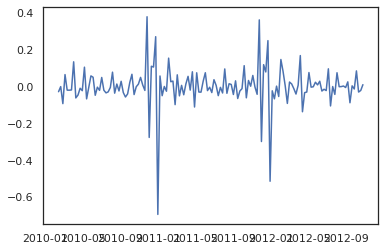

In [65]:
ts_log_diff = (ts_log - ts_log.shift())
plt.plot(ts_log_diff)

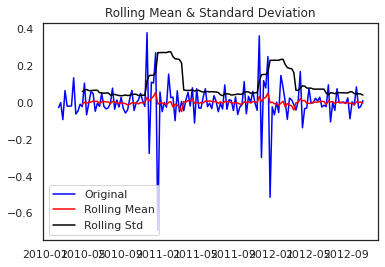

Results of Dickey-Fuller Test:
Test Statistic                -6.747059e+00
p-value                        3.016343e-09
#Lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64 (-6.747058932963333, 3.0163427929849774e-09, 7, 134, {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}, -235.32665327833104)


,weeklySales
2010-02-12,-0.028835
2010-02-19,-0.001236
2010-02-26,-0.093480
2010-03-05,0.063934
2010-03-12,-0.020391


In [66]:
ts_log_diff = ts_log_diff.dropna()
test_stationarity(ts_log_diff['weeklySales'])
ts_log_diff.head()


Setting the frequency of ts_log_diff

In [0]:
ts_log_diff.fillna(0,inplace=True)

In [0]:
ts_log_diff.index = pd.DatetimeIndex(ts_log_diff.index.values,
                               freq=ts_log_diff.index.inferred_freq)

###Decomposing Method

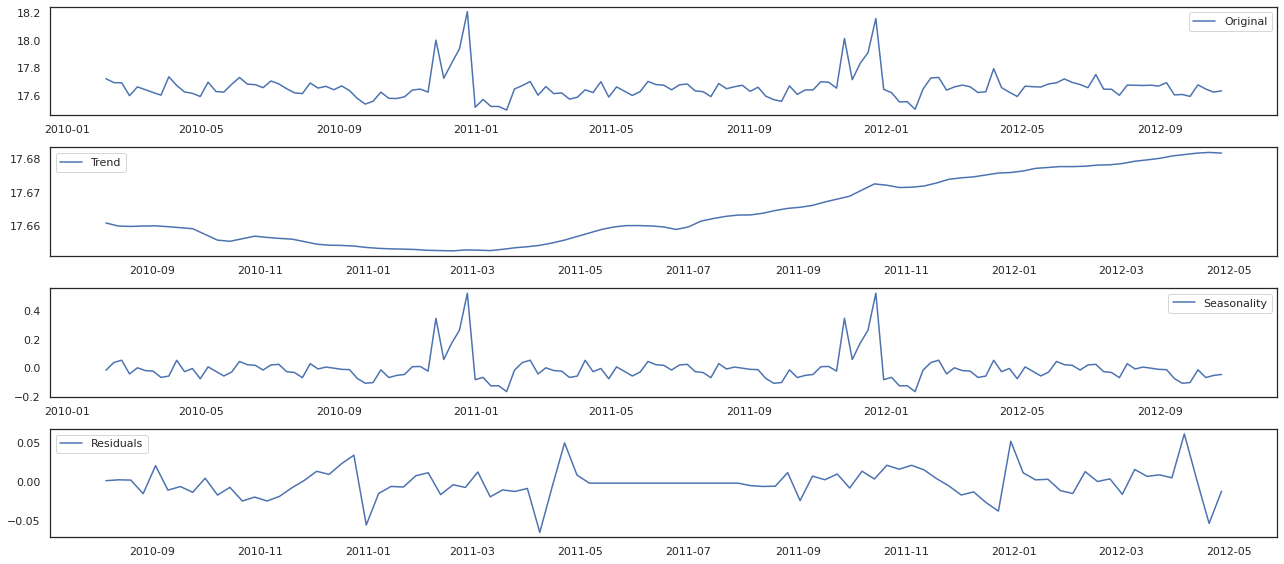

In [69]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
#rcParams change the bydefault size of figure
rcParams['figure.figsize'] = 18, 8

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

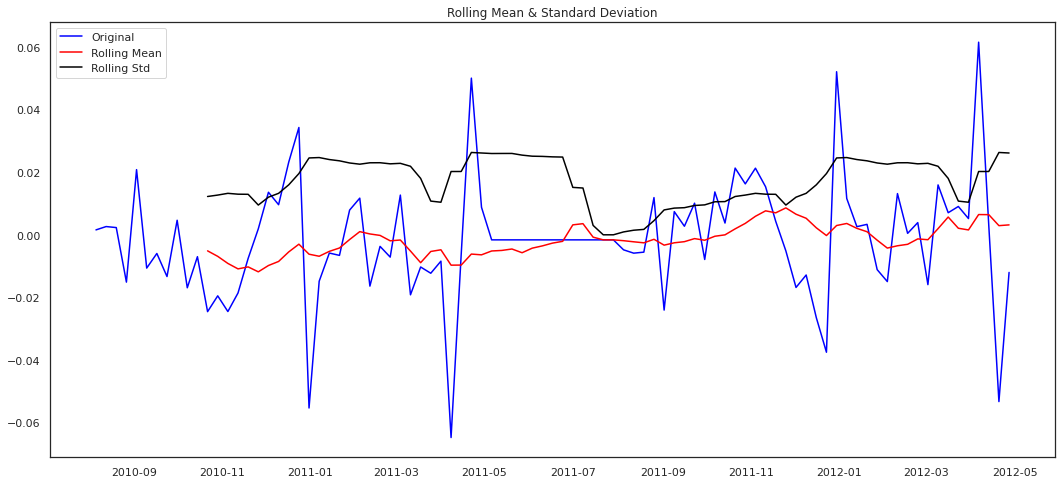

Results of Dickey-Fuller Test:
Test Statistic                -6.824472e+00
p-value                        1.963835e-09
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64 (-6.824472145939133, 1.963835200183456e-09, 1, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -387.98816480089425)


In [70]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose['weeklySales'])

Seasonal decompose reduces the time series into diffirent time series who either product(multiplicative model) or sum(additive model) makes the original time series.



###Forecasting the Time Series

Plotting the ACF and PACF graph to determin p,q,d values

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


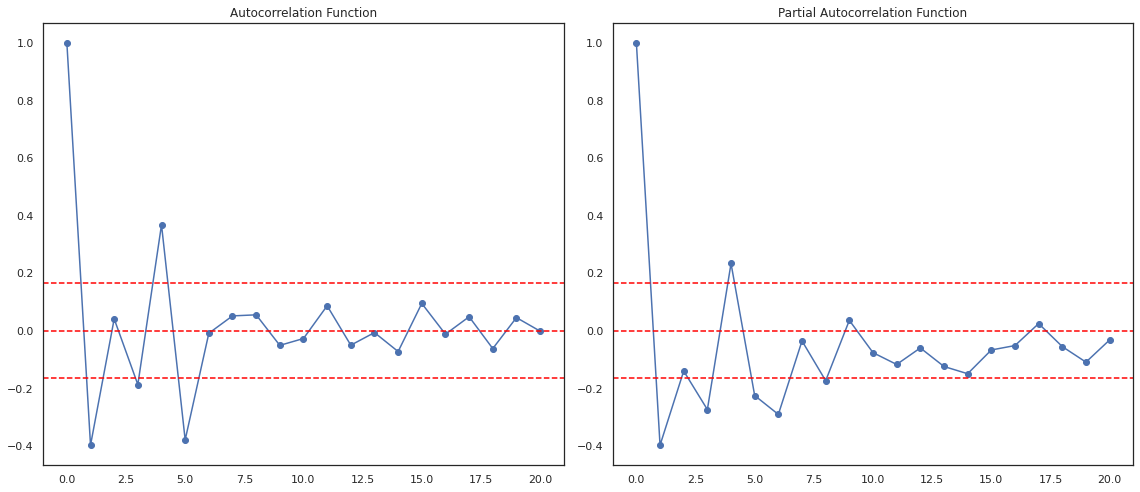

In [71]:

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='red')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='red')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='red')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

We notice that in ACF grah p = 1 (it is where it crosses the positive lag) and q = 1 (it is where pacf crosses the positive lag of)



###Auto Regression Model 


In [0]:
from statsmodels.tsa.arima_model import ARIMA

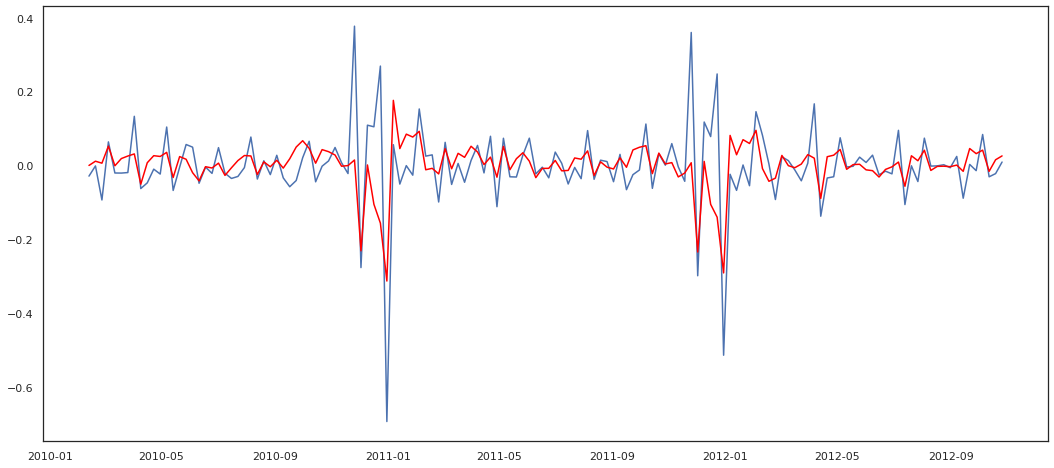

In [73]:
#Arima Model
model = ARIMA(ts_log_diff, order=(2, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [74]:
#Finding sum of Residual Sum of Squares(RSS) for evaluation of ARIMA model
RSS = (results_ARIMA.fittedvalues-ts_log_diff['weeklySales'])**2
RSS.fillna(0,inplace=True)
sum(RSS)

1.2007603377802194

In [75]:
results_ARIMA.fittedvalues

2010-02-12    0.000068
2010-02-19    0.011580
2010-02-26    0.006212
2010-03-05    0.052312
2010-03-12   -0.000844
                ...   
2012-09-28    0.032083
2012-10-05    0.041537
2012-10-12   -0.015877
2012-10-19    0.015489
2012-10-26    0.025925
Freq: W-FRI, Length: 142, dtype: float64

### Predicting future values
Predicted the forecast of log of original function

In [0]:
forecast = results_ARIMA.predict(start=142,end=158)


###Getting Back the Original Function
Adding and Raising to exponent

In [0]:
forecast_cumsum = forecast.cumsum()

In [0]:
rng = pd.date_range('2012-11-02', periods=17, freq='W-FRI')
forecast_log = pd.Series(17.62, index=rng)
forecast_log = forecast_log.add(forecast_cumsum,fill_value=0)

In [0]:
forecast_ARIMA = np.exp(forecast_log)


In [80]:
forecast_ARIMA

2012-11-02    4.566674e+07
2012-11-09    4.598284e+07
2012-11-16    4.619266e+07
2012-11-23    4.630650e+07
2012-11-30    4.637394e+07
2012-12-07    4.641314e+07
2012-12-14    4.643679e+07
2012-12-21    4.645151e+07
2012-12-28    4.646122e+07
2013-01-04    4.646808e+07
2013-01-11    4.647332e+07
2013-01-18    4.647766e+07
2013-01-25    4.648148e+07
2013-02-01    4.648501e+07
2013-02-08    4.648837e+07
2013-02-15    4.649164e+07
2013-02-22    4.649486e+07
Freq: W-FRI, dtype: float64

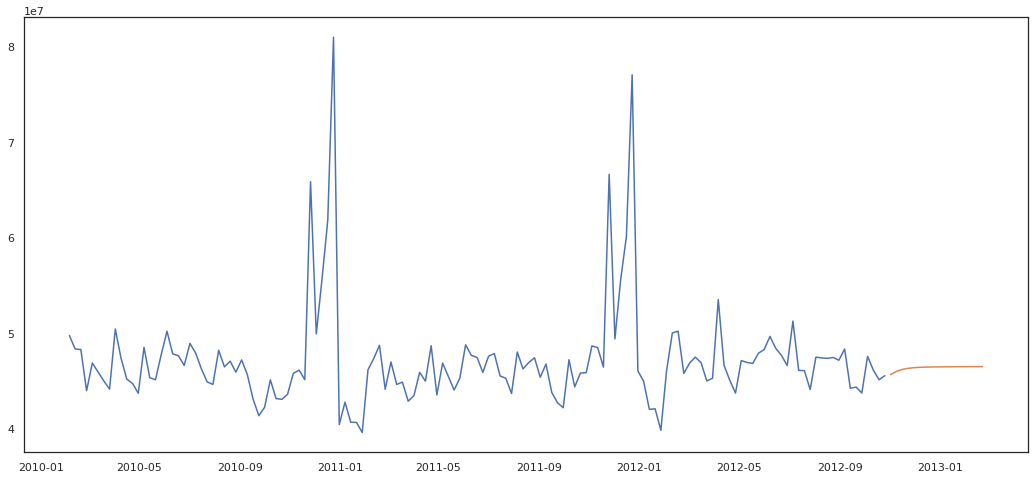

In [81]:
plt.plot(Date_WeeklySales)
plt.plot(forecast_ARIMA)

##4-2 Feature Selection
We ended up with 20 features after our data cleaning process. Here will try to understand what the model (random forest) sees as more important. This, plus the knowledge we acquired during the initial data analysis will guide us in the decision of the most important features.

In order to achieve it, we will run the random forest model with our entire dataset and check what are the most important features for the model.We ended up with 20 features after our data cleaning process. Here will try to understand what the model (random forest) sees as more important. This, plus the knowledge we acquired during the initial data analysis will guide us in the decision of the most important features.

In order to achieve it, we will run the random forest model with our entire dataset and check what are the most important features for the model.

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X = dataset_model.drop('weeklySales',axis=1)
y = dataset_model['weeklySales']



In [0]:
X=X.drop('Type',axis=1)

In [0]:
X=X.drop('Black_Friday',axis=1)

In [0]:
X=X.drop('Pre_christmas',axis=1)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=34)

In [0]:
rf = RandomForestRegressor(n_jobs=-1) #The default value of n_estimators changed from 10 to 100 in 0.22.

In [88]:
rf.fit(X_train,y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

0.9730251983641901


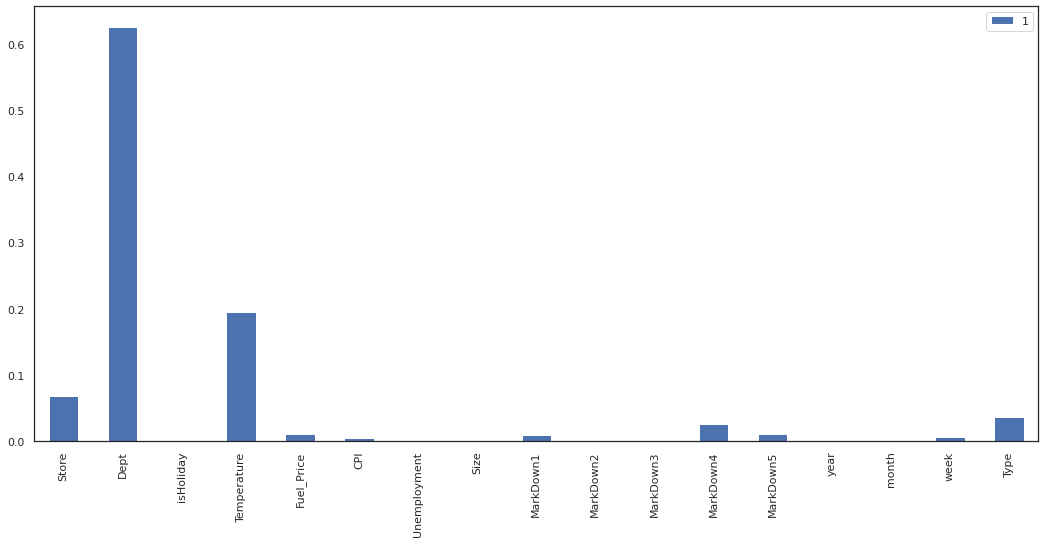

In [89]:
y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred))


(pd.DataFrame([X.columns,rf.feature_importances_],columns=['Store', 'Dept', 'isHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Size', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'year', 'month','week','Type']).T).plot.bar()

Taking into consideration the previous analysis of the features and the current, we end up with the following features



In [90]:
dataset_model_final = dataset_model[['Store','Dept','weeklySales','Temperature','week','isHoliday','Size']]
dataset_model_final.head()

,Store,Dept,weeklySales,Temperature,week,isHoliday,Size
0,1,1,24924.50,42.31,5,0,151315
1,1,1,46039.49,38.51,6,1,151315
2,1,1,41595.55,39.93,7,0,151315
3,1,1,19403.54,46.63,8,0,151315
4,1,1,21827.90,46.50,9,0,151315


##4-3 Machine Learning Model

The metric which will evaluate the models is the following:

We implement it in the function below



In [0]:
def WMAE(dataset, real, predicted):
    weights = dataset.isHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

The model we choose for this case is the Random Forest model. Random forests is an ensemble learning method for classification or regression. It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

We chose this model because of its ensemble configuration and relatively easy interpretation/implementation, makes this model a powerful tool. Although the ideal situation would be testing multiple models and see which one performs better, we are limited by computational power on kaggle, so to make it faster, we will try only this model.

We split again the dataset into test and train set and create a function in order to hypertune the model



In [0]:
from sklearn.tree import DecisionTreeRegressor

X = dataset_model_final.drop('weeklySales',axis=1)
y = dataset_model_final['weeklySales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



def model_hypertuning(max_d,max_estimators):
    '''hypertune random forest model'''

    print('Random forest model started')
    error_train = []
    max_depth = np.arange(10, max_d+10, 10).tolist()
    n_estimators = np.arange(10, max_estimators, 20).tolist()
    hyperparams = []
    """Calculating errors for maximum depth and number of estimators parameters."""
    for i in max_depth: 
        print("Max Depth: %f" % i)
        print()
        for j in n_estimators: 
            print("Estimators: %f" % j)
            rf = RandomForestRegressor(max_depth=i, n_estimators=j, n_jobs=-1) 
            rf.fit(X_train, y_train)  
            y_pred_train_rf = rf.predict(X_train) 
            error_train.append(WMAE(X_train,y_train, y_pred_train_rf)) 
            hyperparams.append({'Maximum Depth':i, 'No. of Estimators':j})
            
    return error_train,hyperparams


Now we hypertune the model



In [93]:
tuning_model_rf = model_hypertuning(40,140)

Random forest model started
Max Depth: 10.000000

Estimators: 10.000000
Estimators: 30.000000
Estimators: 50.000000
Estimators: 70.000000
Estimators: 90.000000
Estimators: 110.000000
Estimators: 130.000000
Max Depth: 20.000000

Estimators: 10.000000
Estimators: 30.000000
Estimators: 50.000000
Estimators: 70.000000
Estimators: 90.000000
Estimators: 110.000000
Estimators: 130.000000
Max Depth: 30.000000

Estimators: 10.000000
Estimators: 30.000000
Estimators: 50.000000
Estimators: 70.000000
Estimators: 90.000000
Estimators: 110.000000
Estimators: 130.000000
Max Depth: 40.000000

Estimators: 10.000000
Estimators: 30.000000
Estimators: 50.000000
Estimators: 70.000000
Estimators: 90.000000
Estimators: 110.000000
Estimators: 130.000000


Once we have hypertuned the model, we check what is the ideal configuration

No. of Estimators,10,30,50,70,90,110,130
Maximum Depth,,,,,,,
10,4389.08,4343.02,4352.88,4362.31,4360.22,4370.23,4358.03
20,1054.18,1022.09,1010.69,1008.24,1010.18,1005.95,1003.68
30,764.14,719.39,708.60,704.14,701.92,700.55,698.25
40,761.29,715.10,705.14,698.49,696.46,695.25,695.11


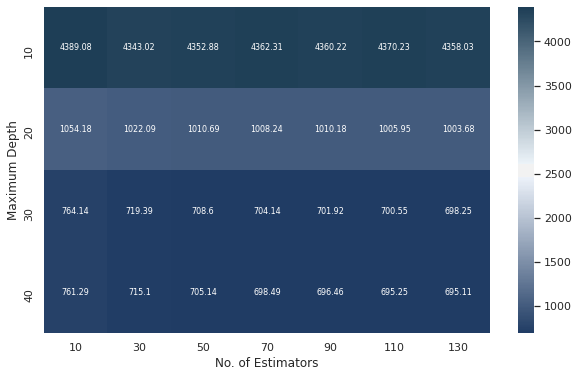

In [94]:
hyperparams = pd.DataFrame(tuning_model_rf[1])
hyperparams['Train Error']=tuning_model_rf[0]
hyperparams_pivot = pd.pivot_table(hyperparams,'Train Error','Maximum Depth','No. of Estimators')

cmap = sns.diverging_palette(252, 240,s=75 ,l=25,n=6, as_cmap=True)
plt.figure(figsize=(10,6))
p1 = sns.heatmap(hyperparams_pivot,annot=True, annot_kws={"size": 8}, fmt='g', cmap=cmap) 

hyperparams_pivot.head()

After tuning our model, we re-run it with the best configurations. We see that 110 estimators and 40 is the ideal.



In [95]:
model_rf = RandomForestRegressor(max_depth= 40, n_estimators=110,n_jobs=-1).fit(X_train, y_train) # Fit the model with best hyper parameter values.
y_pred = model_rf.predict(X_test) # Predict the test data.
print('Weighted Mean Absolute Error (WMAE) for Random Forest Regression:', WMAE(X_test,y_test, y_pred)) # Get WMAE score.

Weighted Mean Absolute Error (WMAE) for Random Forest Regression: 1881.91


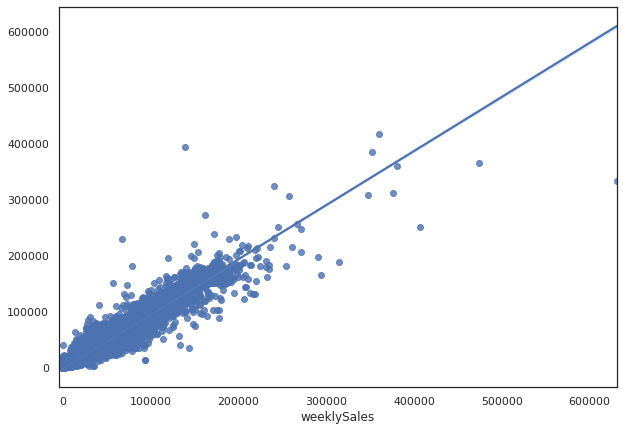

In [96]:
# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=y_test, y=y_pred)

we need to predict with the test data, so we will re-run the model with the test data, but first we need to organize the test dataset. We will apply the same data cleaning as before.

In [97]:
# Joining test data with store and features.
test_final = testdataset.merge(featuresdataset, on=['Store', 'Date'], how='inner').merge(storesdataset, on=['Store'], how='inner')

# Converting Date to datetime
test_final['Date'] = pd.to_datetime(test_final['Date'])

# Extract date features
test_final['year']=test_final['Date'].dt.year
test_final['month']=test_final['Date'].dt.month
test_final['day']=test_final['Date'].dt.day
test_final['week']=test_final['Date'].dt.week

#One hot encoding 
test_final = pd.get_dummies(test_final)

#fill nans with 0
test_final = test_final.fillna(0)

#drop date
test_final = test_final.drop(['Date','day'], axis=1)

#add easter holiday
test_final.loc[(test_final.year==2013) & (test_final.week==13), 'isHoliday'] = True

#convert binary to numeric
test_final = test_final*1

def check_holidays(year,month):
    '''
    For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

    Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 -> ok
    Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 -> ok
    Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 -> ok
    Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
    '''
    return test_final[(test_final.isHoliday == 1)  & (test_final.year == year) & (test_final.month == month)]

check_holidays(2013,2) 

,Store,Dept,isHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,year,month,week,Type_A,Type_B,Type_C
1006,1,1,1,56.67,3.417,32355.16,729.80,280.89,20426.61,4671.78,224.235029,6.525,1,151315,2013,2,6,1,0,0
1007,1,2,1,56.67,3.417,32355.16,729.80,280.89,20426.61,4671.78,224.235029,6.525,1,151315,2013,2,6,1,0,0
1008,1,3,1,56.67,3.417,32355.16,729.80,280.89,20426.61,4671.78,224.235029,6.525,1,151315,2013,2,6,1,0,0
1009,1,4,1,56.67,3.417,32355.16,729.80,280.89,20426.61,4671.78,224.235029,6.525,1,151315,2013,2,6,1,0,0
1010,1,5,1,56.67,3.417,32355.16,729.80,280.89,20426.61,4671.78,224.235029,6.525,1,151315,2013,2,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113443,45,93,1,28.99,3.753,53311.88,531.33,78.26,24823.94,3233.44,192.897089,8.625,1,118221,2013,2,6,0,1,0
113444,45,94,1,28.99,3.753,53311.88,531.33,78.26,24823.94,3233.44,192.897089,8.625,1,118221,2013,2,6,0,1,0
113445,45,95,1,28.99,3.753,53311.88,531.33,78.26,24823.94,3233.44,192.897089,8.625,1,118221,2013,2,6,0,1,0
113446,45,97,1,28.99,3.753,53311.88,531.33,78.26,24823.94,3233.44,192.897089,8.625,1,118221,2013,2,6,0,1,0


Now that we have eveything numeric, we will convert select only the important features we selected initially

In [98]:
test_final = test_final[['Store','Dept','Temperature','week','isHoliday','Size']]
test_final.head()

,Store,Dept,Temperature,week,isHoliday,Size
0,1,1,55.32,44,0,151315
1,1,2,55.32,44,0,151315
2,1,3,55.32,44,0,151315
3,1,4,55.32,44,0,151315
4,1,5,55.32,44,0,151315


Final prediction

In [99]:
y_pred_final = model_rf.predict(test_final) # Predict the test data.
y_pred_final

array([31425.78027273, 46592.38409091,  9749.42581818, ...,
       52113.73145455,  6682.99290909,   523.00463636])